In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sb
import scipy as sp
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:



OriginalTrianDF = pd.read_table("a3-train.data",header=None, sep ="\s+")
OriginalTestDF = pd.read_table("a3-test.data",header=None, sep ="\s+")
TrainLabels = pd.read_table("a3-train.labels.txt",header = None)
TestLabels = pd.read_table("a3-test.labels.txt",header = None)
OriginalTrianDF.head()

##normalising the data to a same scale
normaliser = StandardScaler()

OriginalTrianDF =pd.DataFrame( normaliser.fit_transform(OriginalTrianDF))
OriginalTestDF = pd.DataFrame(normaliser.fit_transform(OriginalTestDF))

## Exploratory Data Analysis

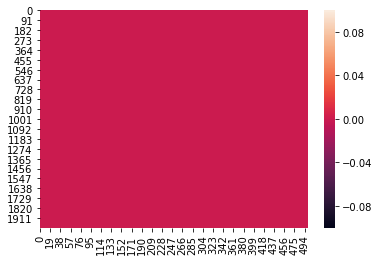

In [3]:
#check for NA values in each column
sb.heatmap(pd.isna(OriginalTrianDF))

##had there been NA the plot would show in white

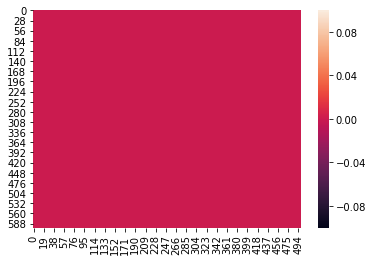

In [59]:
#check for na values in test set
sb.heatmap(pd.isnull(OriginalTestDF))
##none have any explicti NA values

In [133]:
OriginalTrianDF.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-3.822165e-15,4.312939e-16,8.160139e-17,-2.891576e-16,-2.671752e-16,-2.207845e-15,-6.302459e-16,1.588507e-15,3.756995e-16,1.866673e-15,...,-7.103207e-16,-5.942191e-15,7.335244e-16,1.105227e-16,-3.376743e-16,7.689405e-16,2.982531e-15,-1.942335e-15,6.636358e-16,-7.450152e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-3.071962e+00,-3.394856e+00,-3.604218e+00,-3.354575e+00,-3.156487e+00,-2.981783e+00,-3.601792e+00,-4.020619e+00,-3.776145e+00,-3.309027e+00,...,-3.613081e+00,-3.942298e+00,-3.979592e+00,-2.872691e+00,-3.605239e+00,-3.014500e+00,-3.609285e+00,-3.563542e+00,-3.895661e+00,-3.379938e+00
25%,-7.355732e-01,-6.445761e-01,-6.471166e-01,-7.048753e-01,-6.431392e-01,-6.268530e-01,-6.744478e-01,-4.082030e-01,-6.511603e-01,-6.661453e-01,...,-6.922974e-01,-7.009943e-01,-6.408856e-01,-7.254149e-01,-6.750729e-01,-6.646998e-01,-7.177067e-01,-6.866839e-01,-6.980252e-01,-6.687371e-01
50%,4.322320e-02,-1.499400e-02,8.588450e-03,-4.245040e-02,-3.896898e-02,-3.812043e-02,-2.699319e-03,3.142802e-01,1.372998e-02,2.934990e-02,...,-2.195376e-02,4.699891e-02,-1.487811e-02,5.826250e-02,-4.307631e-02,2.857144e-03,-3.733537e-02,-2.279357e-02,6.180305e-04,-1.030256e-02
75%,6.662603e-01,6.477241e-01,6.642935e-01,7.303787e-01,6.377016e-01,6.977953e-01,6.443978e-01,3.142802e-01,6.287535e-01,7.248451e-01,...,6.483899e-01,5.456610e-01,6.528632e-01,7.008779e-01,6.751016e-01,6.437118e-01,6.430359e-01,6.410967e-01,6.723903e-01,6.578148e-01
max,3.314168e+00,3.861907e+00,3.698536e+00,3.932099e+00,4.504391e+00,3.788641e+00,3.226624e+00,3.204213e+00,3.271692e+00,3.367727e+00,...,3.186120e+00,4.534958e+00,3.323829e+00,3.318360e+00,3.490359e+00,4.008199e+00,3.704707e+00,3.813017e+00,3.655059e+00,3.591722e+00


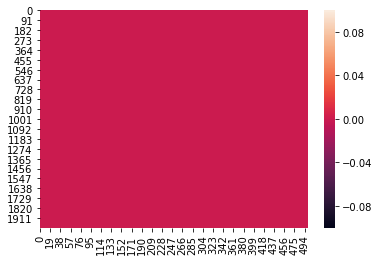

In [6]:
#Checking if NA's were represented by -1 
#the heat map will show graphically in white if there were values less than zero
sb.heatmap(OriginalTrianDF<0)
#appears none have a negative number
#conclusion the data does not have missing values

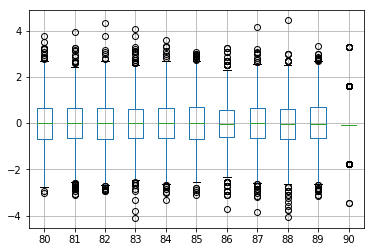

In [29]:
OriginalTrianDF.loc[:,80:90].boxplot()
##Cheking if outliers are present in the data, since the occurence is too frequent , I am considering outliers as genuine data
## Will revisit outlier treatment If I cannot immprove model accuracy highly

Randomly selecting 80th to 90th columns, It can be seen that there are outliers in the data.

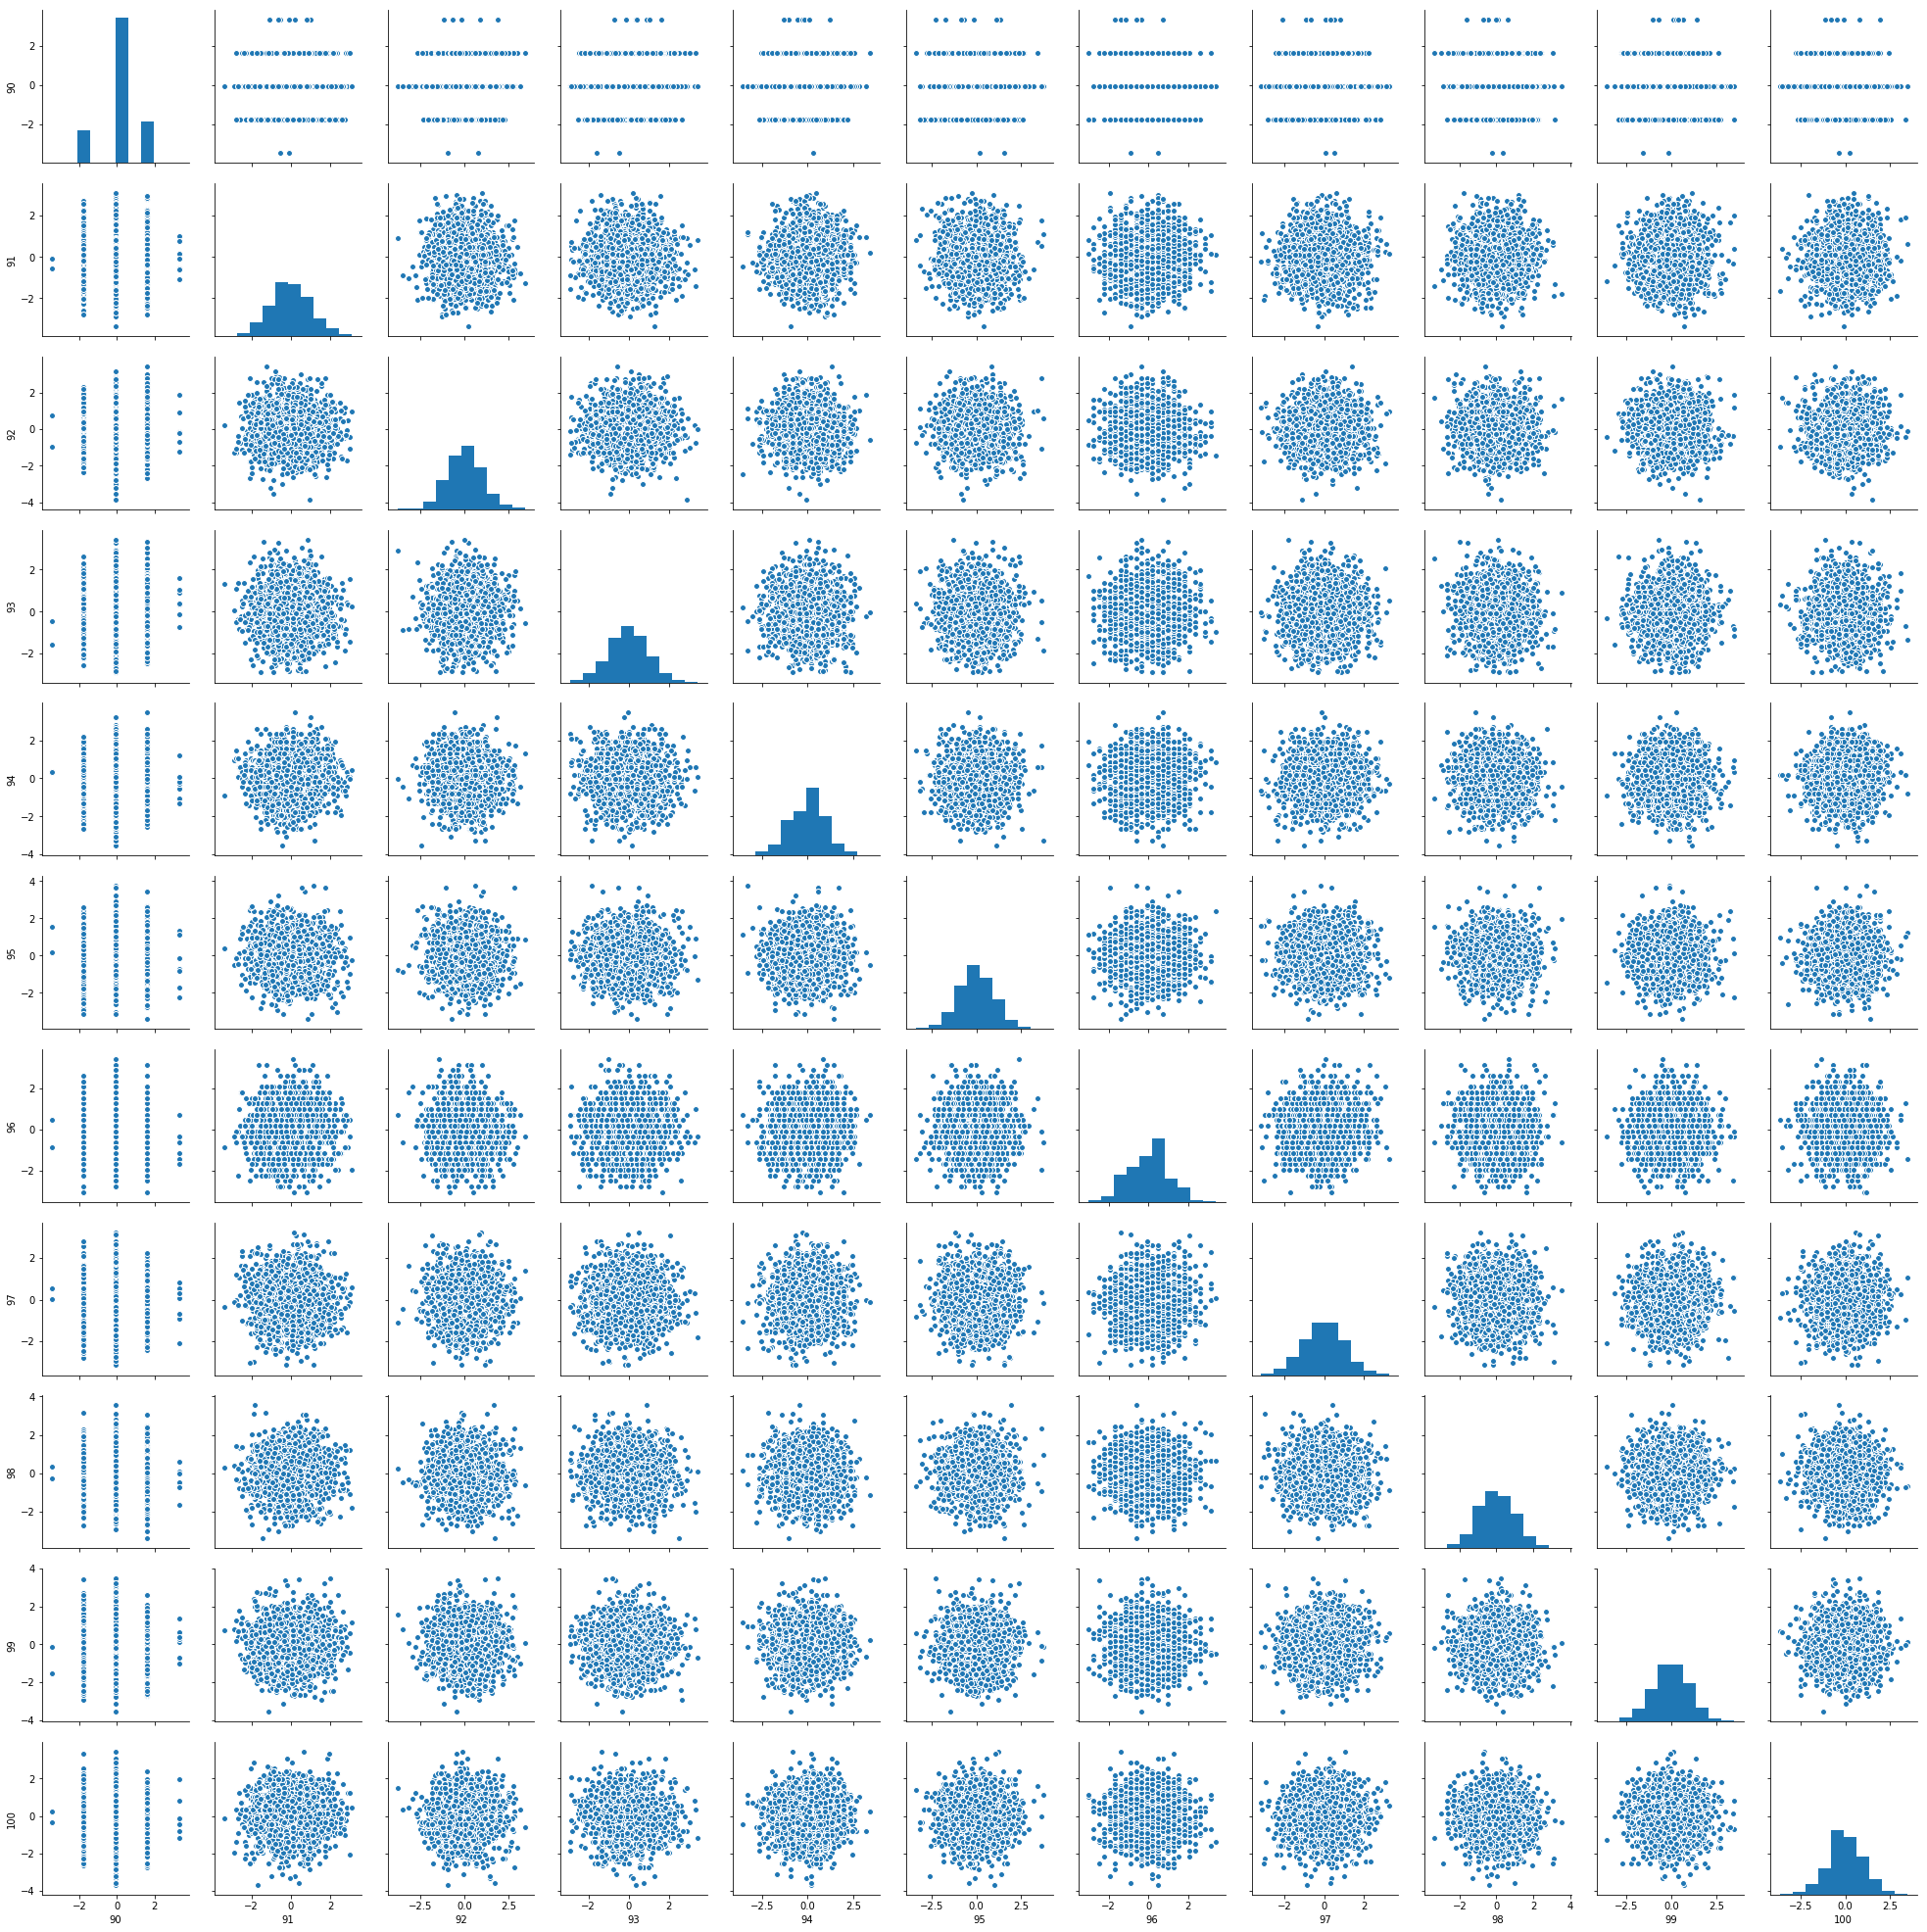

In [19]:
sb.pairplot(OriginalTrianDF.loc[:,90:100])
##found that there are columns with certain descrete values eg. observe column 90

In [63]:
#finding all the unique values in each column to see if there is a chance to consider them categorical 
##as we observed in the above plot

def getUniqueInEachColumn(DF):
    for column in DF.columns:
        print("column ", column, ":  ", pd.unique(DF[column]))
        print(len(pd.unique(DF[column])))

        
def getUniqueInEachColumnCount(DF,countThresh):
    for column in DF.columns:
        if len(pd.unique(DF[column])) <= countThresh: 
            print("column ", column," and the number of unique values are ", len(pd.unique(DF[column])))
         
            

        
# getUniqueInEachColumn(OriginalTrianDF)
getUniqueInEachColumnCount(OriginalTrianDF,10)



column  90  and the number of unique values are  5
column  154  and the number of unique values are  10
column  168  and the number of unique values are  9
column  173  and the number of unique values are  9
column  198  and the number of unique values are  10
column  228  and the number of unique values are  7
column  276  and the number of unique values are  5
column  280  and the number of unique values are  10
column  283  and the number of unique values are  10
column  332  and the number of unique values are  8
column  402  and the number of unique values are  10
column  404  and the number of unique values are  6
column  423  and the number of unique values are  5


It can be seen from above that the columns in the above list have unique values <= 10, and have the potential to be considers as categorical features. However the reduction of these columns to categorical **decreased** the accuracy of the model.

In [17]:
def getUniqueInEachColumnCountEqual(DF,countThresh):
    for column in DF.columns:
        if len(pd.unique(DF[column])) == countThresh: 
            print("column ", column, ":  ", pd.unique(DF[column]))
            print(len(pd.unique(DF[column])))
    else :
        print("No Columns equal to the threshhold given")
            
getUniqueInEachColumnCountEqual(OriginalTrianDF,OriginalTrianDF.shape[0])

print("There were no unique identifier columns")

No Columns equal to the threshhold given
There were no unique identifier columns


In [5]:
TrainLabels[0].value_counts()
##50-50 balanced data

 1    1000
-1    1000
Name: 0, dtype: int64

In [139]:
TestLabels[0].value_counts()

## 50 50 balanced data in test as well

 1    300
-1    300
Name: 0, dtype: int64

In [18]:

##get corelation between independent variables
OriginalTrianDF.corr().abs().head()
def getLowerTraingleCorrMatrix(df):
    corrMatrix = df.corr().abs()
    requiredIndices  = []
    requiredRow = []
    requiredCol = []
    valueList = []
    for row in range(corrMatrix.shape[0]):
        for col in range(row):
            requiredRow.append(row)
            requiredCol.append(col)
#             requiredIndices.append((row,col))
            valueList.append(corrMatrix.iloc[row,col])
    return pd.DataFrame({'col1':requiredRow,'col2':requiredCol,'CorrelationValue': valueList})


corrNonReduValues = getLowerTraingleCorrMatrix(OriginalTrianDF)
corrNonReduValues[corrNonReduValues['CorrelationValue'] >=0.8]

    

,col1,col2,CorrelationValue
8233,128,105,0.989410
39493,281,153,0.988695
50431,318,28,0.989628
56344,336,64,0.990429
71301,378,48,0.988338
93681,433,153,0.989355
93809,433,281,0.989047
101503,451,28,0.989168
101793,451,318,0.988690
111598,472,442,0.990300


In the above pairs we can remove one of the column as they are highly corelated.

In [58]:
##generating ANOVA : FScore and pvalue for predictor and target variable. 
##Will reject the null hypothesis that the means of continous variables are equal between the classes 
##if the pvalue of the test turns out to be less than 0.05
## see section for logistic regression to see the subset of theese variables considerd

import scipy.stats as stats

def getCorrWithCatTarget(df,y):
    ###need to perform one way anova test
        temp = map (lambda x : stats.f_oneway(df[[x]][y == 1],df[[x]][y == -1]), df.columns.tolist())
        pValueList = [pvalue[1][0] for pvalue in temp]
        indexList = [i for i in range(len(pValueList))]
        return pd.DataFrame( {'colIndex':indexList, 'pvalues': pValueList})


TargetCorrDf = getCorrWithCatTarget(OriginalTrianDF,TrainLabels[0])

##sample head of the pvalues that are less than 0.05
TargetCorrDf[TargetCorrDf['pvalues']<=0.05].head()
# stats.f_oneway(OriginalTrianDF[[130]][TrainLabels[0]==1],OriginalTrianDF[[1]][TrainLabels[0]==-1])

,colIndex,pvalues
10,10,3.056396e-02
48,48,1.073253e-07
55,55,1.757217e-02
64,64,1.408417e-11
105,105,1.463348e-08


## Baseline Models
1. Logistic Regression
2. Random Forest
3. KNearest Neighbours
4. Gradient Boosting 



In [19]:
##Logistic regression
# OriginalTrianDF.columns.tolist()
# import sklearn.linear_model
import sklearn.linear_model 

logi = sklearn.linear_model.LogisticRegression()
logi.fit(OriginalTrianDF,TrainLabels[0])

print("the accuracy of the basseline logitic model is " , logi.score(OriginalTestDF,TestLabels[0]))


the accuracy of the basseline logitic model is  0.58


In [11]:
##Random forest baseline Model

from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier(n_estimators = 1000, random_state = 22,max_depth=10)

rfClassifier.fit(OriginalTrianDF, TrainLabels[0])
print("the accuracy of the baseline RandomForest model is " , rfClassifier.score(OriginalTestDF,TestLabels[0]))


the accuracy of the baseline RandomForest model is  0.73


In [20]:
##KNN Baseline Model
from sklearn import neighbors

KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=521)
# Train the model on training data
KNNClassifier.fit(OriginalTrianDF,TrainLabels[0])
print("the accuracy of the baseline KNN model is " , KNNClassifier.score(OriginalTestDF,TestLabels[0]))

the accuracy of the baseline KNN model is  0.6133333333333333


In [10]:
##Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

GBClassifier = GradientBoostingClassifier(max_depth=15,max_features=3,random_state=21)
GBClassifier.fit(OriginalTrianDF,TrainLabels[0])
print("the accuracy of the baseline Gradient Boost model is " , GBClassifier.score(OriginalTestDF,TestLabels[0]))

the accuracy of the baseline Gradient Boost model is  0.63


## Feature enginering 

In [21]:
##running a loop to see top how many important features to be considered for the best accuracy
##below is the result of the experiment
rfClassifierForLoop = RandomForestClassifier(n_estimators = 100, random_state = 22,max_depth=10)
for i in range(10,50,10):
##getting the top feature  importances feature engineering
    featureImpDF = pd.DataFrame({'Feature' :OriginalTrianDF.columns.tolist(),
                                 'Feature Importance' : list(rfClassifier.feature_importances_)})
    
    ImpFeatureList = featureImpDF.sort_values('Feature Importance',ascending= False).nlargest(i,'Feature Importance')['Feature'].tolist()

    

    rfClassifierForLoop.fit(OriginalTrianDF[ImpFeatureList], TrainLabels[0])
    print("Number of features considered : " ,i ," and Accuracy is " ,rfClassifierForLoop.score(OriginalTestDF[ImpFeatureList],TestLabels[0]))

Number of features considered :  10  and Accuracy is  0.8433333333333334
Number of features considered :  20  and Accuracy is  0.89
Number of features considered :  30  and Accuracy is  0.865
Number of features considered :  40  and Accuracy is  0.8683333333333333


**It can be seen above that when top 20 features are considered, the accuracy is highest **

In [22]:
##setting feature importnace list to top 20 features
featureImpDF = pd.DataFrame({'Feature' :OriginalTrianDF.columns.tolist(),
                                 'Feature Importance' : list(rfClassifier.feature_importances_)})
    
ImpFeatureList = featureImpDF.sort_values('Feature Importance',ascending= False).nlargest(20,'Feature Importance')['Feature'].tolist()





In [57]:
##getting correlation between impportant features that are more than 0.8
corrNonReduValues = getLowerTraingleCorrMatrix(OriginalTrianDF[ImpFeatureList])
corrNonReduValues[corrNonReduValues['CorrelationValue']>=0.8]

,col1,col2,CorrelationValue
1,2,0,0.989272
13,5,3,0.989410
19,6,4,0.990300
35,8,7,0.990429
54,10,9,0.988338
89,13,11,0.989355
116,15,11,0.988695
118,15,13,0.989047
132,16,12,0.988458
150,17,14,0.989628


In [50]:
##keep only one correlated column
##observing above table we get the unique non associated columns as 
nonCorrColumns = [2,5,6,8,10,13,16,17]

##the below columns can be dumped for logistic regressions
corrColumnsDumped = [0,3,4,7,9,15,11,12,14,18]
# ImpFeatureList = np.array(ImpFeatureList)[nonCorrColumns].tolist()


In [56]:
##get pvalue of the anova test for traget variable and dump the columns that are not explaining the target variable
##since this affects the logistic regression
##rejecting the null hypotheisis that they hade an equal mean and level of significance test being 0.05
corrImpFeatTarget = getCorrWithCatTarget(OriginalTrianDF[ImpFeatureList],TrainLabels[0])
corrImpFeatTarget[corrImpFeatTarget['pvalues']>=0.05]

##columns within the important features obtained above that do not have significant association with target variable
corrColumnsNotRelatedToTarget = corrImpFeatTarget[corrImpFeatTarget['pvalues']>=0.05]['colIndex']

### Model Selection

**Going further I'll use the top 20 imporant features obtained, except for logistic as I transform the X for Logistic**

Models tuned,
<br>
1. Logistic Regression (Lambda and Theta)
2. Random Forest
3. KNearest Neighbours
4. Gradient Boosting 
5. Logistic Rregression (Polynomial Features)

In [56]:

#Logistic regression hyper tuning

from sklearn.metrics import accuracy_score

def searchBestParamsLogi(TrainX,TrainLabel,TestX,TestLabel):
    
    lamdas = [0.1,0.3,1,10,100,1000] # smaller the value more the regularisation
    invLam = [1/i for i in lamdas] # smaller the value more the regularisation
    Threshold = [i*0.1  for  i in range(0,10,1)]

    LamdaThreshAccu = {'Lamda':[],'Theta':[],'TestAccuracy':[]}

    
    for eachLamda in invLam:
        listOfAccuracy = []
        logi = sklearn.linear_model.LogisticRegression(penalty= 'l2', C = eachLamda)
        for diffThreshs in Threshold:

            logi.fit(TrainX,TrainLabel)
#             print(logi.classes_ ) # -1,1
#             print(diffThreshs)
            ##test Accuracy
            Y_test_pred = logi.predict_proba(TestX)[:,1] >= diffThreshs
            Y_test_pred = pd.Series(Y_test_pred).map({True : 1, False : -1})

            TestAccuracy = accuracy_score(TestLabel,Y_test_pred)

           
            LamdaThreshAccu['Lamda'].append(1/eachLamda)
            LamdaThreshAccu['Theta'].append(diffThreshs)
          
            LamdaThreshAccu['TestAccuracy'].append(TestAccuracy)
            
    LamdaThreshAccuDf = pd.DataFrame(LamdaThreshAccu)


    maxValAccu = LamdaThreshAccuDf[LamdaThreshAccuDf['TestAccuracy']==LamdaThreshAccuDf['TestAccuracy'].max()]
    
    print(maxValAccu)

    
searchBestParamsLogi(OriginalTrianDF[ImpFeatureList],TrainLabels[0],OriginalTestDF[ImpFeatureList],TestLabels[0])



    Lamda  Theta  TestAccuracy
35   10.0    0.5         0.605


The accuracy remaains same at 59%, need to find a better method to increase the accuracy of logistic model and is attempted below by doing polynoomial regression

In [29]:

def searchBestForest(TrainX,TrainLabel,TestX,TestLabel):
    ForestAccuDf = pd.DataFrame()


    for estimator in [600]:
        for depth in [5,10,15]:
            for mtry in range(3,TrainX.shape[1],3):

                rfClassifier = RandomForestClassifier(n_estimators = estimator, random_state = 22,
                                                      max_depth=depth,max_features= mtry)

                rfClassifier.fit(TrainX, TrainLabel)
                accuraccy = rfClassifier.score(TestX,TestLabel)

                ForestAccuDf = ForestAccuDf.append({'NumTrees':estimator,
                                                    'featuresConsidered':mtry,
                                                    'maxDepth':depth,'Accu': accuraccy}, ignore_index=True)

    maxValAccu = ForestAccuDf[ForestAccuDf['Accu']==ForestAccuDf['Accu'].max()]
    print(maxValAccu)

searchBestForest(OriginalTrianDF[ImpFeatureList],TrainLabels[0],OriginalTestDF[ImpFeatureList],TestLabels[0])


##best para
#     depth = 15
#     mtry = 3
#     estimator = 600
    


    Accu  NumTrees  featuresConsidered  maxDepth
12   0.9     600.0                 3.0      15.0


The best parameters for the random forest model is as above

In [55]:
##checking for the best paramaeters in Gradient boositing
###Boosting CV
from sklearn.model_selection import GridSearchCV


GBForCV = GradientBoostingClassifier(random_state= 42)
param_grid = { 
    'n_estimators': [500,600],
    'learning_rate': [0.1,0.3],
    'subsample' : [1],
    'max_depth' : [15],
    'max_features' : [3]
}


CV_rfc = GridSearchCV(estimator = GBForCV, param_grid=param_grid, cv= 3)
CV_rfc.fit(OriginalTrianDF[ImpFeatureList],TrainLabels[0])

CV_rfc.best_params_

{'learning_rate': 0.1,
 'max_depth': 15,
 'max_features': 3,
 'n_estimators': 500,
 'subsample': 1}

In [30]:

def searchBestKinKNN(TrainX,TrainLabel,TestX,TestLabel):
    KnAccuracy = {'K':[],'Accu': []}
    for k in range(1,200,1):
        KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors = k)
        # Train the model on training data
        KNNClassifier.fit(TrainX,TrainLabel)
        accuracyAtDiffK  = KNNClassifier.score(TestX,TestLabel)
        KnAccuracy['K'].append(k)
        KnAccuracy['Accu'].append(accuracyAtDiffK)
        
        KnAccuracyDf = pd.DataFrame(KnAccuracy)
        maxValAccu = KnAccuracyDf[KnAccuracyDf['Accu']==KnAccuracyDf['Accu'].max()]
    print(maxValAccu)
#6

searchBestKinKNN(OriginalTrianDF[ImpFeatureList],TrainLabels[0],OriginalTestDF[ImpFeatureList],TestLabels[0])


   K   Accu
5  6  0.925


**From above K =6 gives the best accurracy for the KNN**

In [31]:
##Gradient boosting with best paramss
from sklearn.ensemble import GradientBoostingClassifier

GBClassifier = GradientBoostingClassifier(max_depth=15,max_features=3,random_state=21)
GBClassifier.fit(OriginalTrianDF[ImpFeatureList],TrainLabels[0])
print("the accuracy of the  Gradient Boost model with best params is " , GBClassifier.score(OriginalTestDF[ImpFeatureList],TestLabels[0]))

the accuracy of the  Gradient Boost model with best params is  0.9033333333333333


In [36]:

##KNN with best k
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors = 6)

KNNClassifier.fit(OriginalTrianDF[ImpFeatureList],TrainLabels[0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

**In the important features that were obtained form random forest model removing the columns that had no signoficance in the ANOVA test with the target variable and allowing the features to have interaction terms , we get the following result**

In [44]:
## logisitc with best lambda and theta and transformed x
## removing correlated features from the important features and allowing interactions between variables


nonCorrColumns = ~pd.Series(ImpFeatureList).index.isin(corrColumnsNotRelatedToTarget)
polyGen = sklearn.preprocessing.PolynomialFeatures(interaction_only=True,include_bias = False) 
NonCorrFeatures = np.array(ImpFeatureList)[nonCorrColumns].tolist()
X_train_transform = polyGen.fit_transform(OriginalTrianDF[NonCorrFeatures])##generating [x1*x2,x1*x3....]
X_test_transform = polyGen.fit_transform(OriginalTestDF[NonCorrFeatures])##generating [x1*x2,x1*x3....]

logi = sklearn.linear_model.LogisticRegression(penalty='l2',C = 10)
logi.fit(X_train_transform,TrainLabels[0])
print("the accuracy of the transofrmed  logitic model with interaction allowed in X is " , logi.score(X_test_transform,TestLabels[0]))
# searchBestParamsLogi(X_train_transform,TrainLabels[0],X_test_transform,TestLabels[0])

the accuracy of the transofrmed  logitic model with interaction allowed in X is  0.725


**In the important features that were obtained form random forest model removing the columns that had no signoficance in the ANOVA test with the target variable and allowing the polynomial features of 4 degrees , we get the following result**

In [46]:
nonCorrColumns = ~pd.Series(ImpFeatureList).index.isin(corrColumnsNotRelatedToTarget)
polyGen = sklearn.preprocessing.PolynomialFeatures(4, interaction_only=False,include_bias = False) 
NonCorrFeatures = np.array(ImpFeatureList)[nonCorrColumns].tolist()
X_train_transform = polyGen.fit_transform(OriginalTrianDF[NonCorrFeatures])##generating [x1*x2,x1^5, x1*x3....]
X_test_transform = polyGen.fit_transform(OriginalTestDF[NonCorrFeatures])##generating [x1*x2,x1^5, x1*x3....]

logi = sklearn.linear_model.LogisticRegression(penalty='l2',C = 10)
logi.fit(X_train_transform,TrainLabels[0])
print("the accuracy of the transofrmed  logitic model with four degree polynomial is " , logi.score(X_test_transform,TestLabels[0]))


the accuracy of the transofrmed  logitic model with four degree polynomial is  0.8583333333333333


**In the important features that were obtained form random forest model removing the columns that had no signoficance in the ANOVA test with the target variable and allowing the polynomial features of 5 degrees , we get the following result**

In [49]:

###Logistic with 5 degree polynoimal features in the susbet of imporatnt features 

nonCorrColumns = ~pd.Series(ImpFeatureList).index.isin(corrColumnsNotRelatedToTarget)
polyGen = sklearn.preprocessing.PolynomialFeatures(5, interaction_only=False,include_bias = False) 
NonCorrFeatures = np.array(ImpFeatureList)[nonCorrColumns].tolist()
X_train_transform5 = polyGen.fit_transform(OriginalTrianDF[NonCorrFeatures])##generating [x1*x2,x1^5, x1*x3....]
X_test_transform5 = polyGen.fit_transform(OriginalTestDF[NonCorrFeatures])##generating [x1*x2,x1^5, x1*x3....]

logi5 = sklearn.linear_model.LogisticRegression(penalty='l2',C = 10)
logi5.fit(X_train_transform5,TrainLabels[0])
print("the accuracy of the transofrmed  logitic model with five degree polynomial is " , logi5.score(X_test_transform5,TestLabels[0]))


the accuracy of the transofrmed  logitic model with five degree polynomial is  0.865


**We will be retaining the above model with 5 degree transformed polynomial predictors**

In [38]:
## randome forest with best params

rfClassifier = RandomForestClassifier(n_estimators = 600, random_state = 22,max_depth=15,max_features=3)

rfClassifier.fit(OriginalTrianDF[ImpFeatureList], TrainLabels[0])
print("the accuracy of the RandomForest model with important features and best parmaeters is " , rfClassifier.score(OriginalTestDF[ImpFeatureList],TestLabels[0]))

the accuracy of the RandomForest model with important features and best parmaeters is  0.9


In [37]:

GBClassifier = GradientBoostingClassifier(max_depth=15,max_features=3,random_state=21)
GBClassifier.fit(OriginalTrianDF[ImpFeatureList],TrainLabels[0])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False)

In [69]:
##ensemble of Gradient boosting,KNN and Random forest
def ensemble3Models2(Model1,Model2,Model3,Xtest):
    yModel1 = Model1.predict(Xtest)
    yModel2 = Model2.predict(Xtest)
    yModel3 = Model3.predict(Xtest)
#     yModel3 = Model3.predict(XtestTransformed)
    yAllModels = pd.DataFrame({'y1':yModel1,'y2':yModel2,'y3':yModel3})
    return yAllModels.mode(axis = 1)

yEnsemblePred = ensemble3Models2(KNNClassifier,rfClassifier,GBClassifier,OriginalTestDF[ImpFeatureList])
print("The accuracy of KNN, RF and GBM  Ensemble is : " , accuracy_score(TestLabels,yEnsemblePred))

The accuracy of KNN, RF and GBM  Ensemble is :  0.9083333333333333


In [68]:

##ensemble of all 4 models KNN,GB,Logtic and random forest
def ensemble4Models(Model1,Model2,Model3,Model4,Xtest,XtestTransformed):
    yModel1 = Model1.predict(Xtest)
    yModel2 = Model2.predict(Xtest)
    yModel3 = Model3.predict(Xtest)
    yModel4 = Model4.predict(XtestTransformed)
    yAllModels = pd.DataFrame({'y1':yModel1,'y2':yModel2,'y3':yModel3,'y4':yModel4})
    return yAllModels.mode(axis = 1)[0]
    
yEnsemblePred = ensemble4Models(KNNClassifier,rfClassifier,GBClassifier,logi5,OriginalTestDF[ImpFeatureList],X_test_transform5)
print("The accuracy of KNN, RF and GBM andLogistic Ensemble is : " , accuracy_score(TestLabels,yEnsemblePred))


The accuracy of KNN, RF and GBM andLogistic Ensemble is :  0.915


In [53]:
##ensemble of logistic with 5 degree polynomial, random forest and KNN

def ensemble3Models(Model1,Model2,Model3,Xtest,XtestTransformed):
    yModel1 = Model1.predict(Xtest)
    yModel2 = Model2.predict(Xtest)
#     yModel3 = Model3.predict(Xtest)
    yModel3 = Model3.predict(XtestTransformed)
    yAllModels = pd.DataFrame({'y1':yModel1,'y2':yModel2,'y3':yModel3})
    return yAllModels.mode(axis = 1)

yEnsemblePred = ensemble3Models(KNNClassifier,rfClassifier,logi5,OriginalTestDF[ImpFeatureList],X_test_transform5)
print("the accuracy of ensemble of logistic with 5 degree polynomial and KNN with k =6 and random forest with best parameters as above",
      accuracy_score(TestLabels,yEnsemblePred))


the accuracy of ensemble of logistic with 5 degree polynomial and KNN with k =6 and random forest with best parameters as above 0.925


##### The above ensemble of the logistic with 5 degree transformed X, KNN with K =6 and Random Forest with 600 trees, mtry = 3 , and Max depth of the tree as 15 gives the best accuracy of 92.5 %, though I acheive the same accuracy with  just KNN, I think ensembling of models results in more robust predictions and reduces the variance in prediction as results are obtained from different models